In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
def cost_function(g_out, g, alpha):
    term_1 = (np.linalg.norm(g_out - g, 'fro'))**2
    gy, gx = np.gradient(g)
    total_variation = np.sum(np.sqrt(gx**2 + gy**2))
    term_2 = alpha * total_variation
    return term_1 + term_2

In [3]:
def functional_gradient_of_cost_function(g_out, g, alpha, epsilon):
    gy, gx = np.gradient(g)
    denom = np.sqrt(gx**2 + gy**2 + epsilon**2)
    fx = gx / denom
    fy = gy / denom
    divergence = np.gradient(fx)[1] + np.gradient(fy)[0]
    # functional_gradient_TV = - divergence
    term_2 = -alpha*divergence
    term_1 = 2*(g - g_out) # Since Operator A is 1.
    return term_1 + term_2

In [4]:
def convolution(A,B):
    return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(A)))*np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(B))))))

In [5]:
def cost_functional_gradient(g_out, g, alpha, epsilon, h):
    gy, gx = np.gradient(g)
    temp = np.sqrt(gx**2 + gy**2 + epsilon**2)    
    divergence = (np.gradient(gx/temp)[1] + np.gradient(gy/temp)[0])
    
    term_2 = -alpha*divergence
    term_1 = -2*convolution(h[::-1,::-1],g_out-convolution(h,g))
    return term_1 + term_2

In [10]:
def TV_denoising(g_out, alpha, initial_guess, h, initial_step=1,
                 epsilon = 1e-6, next_step = lambda x: 0.5*x,
                 threshold = 1e-8,):
    g = initial_guess
    tau = initial_step
    while True:
        func_grad = cost_functional_gradient(g_out, g, alpha, epsilon, h)
        norm_func_grad = np.linalg.norm(func_grad, 'fro')
        if ((tau*norm_func_grad) < (threshold*np.linalg.norm(g, 'fro'))):
            break
        else:
            g_try = g - tau*func_grad
            Cost_g = cost_function(g_out, g, alpha)
            Cost_try = cost_function(g_out, g_try, alpha)
            if (Cost_try < Cost_g):
                g = g_try
            else:
                tau = next_step(tau)
    return g

In [11]:
A = np.genfromtxt(".\Assignment 3/blurred_img_psf.csv", delimiter=',')
g_out = A[0:255,0:255]
psf = A[0:255,256:511]

In [17]:
y_denoised = TV_denoising(g_out, 35, np.random.randint(0, 255, g_out.shape), psf)

Text(0.5, 1.0, 'Iterated Image')

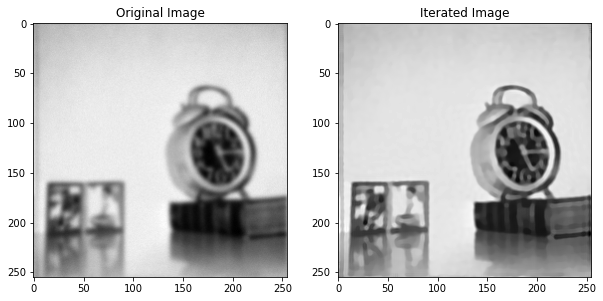

In [18]:
im, ax = plt.subplots(1, 2, figsize= (10,50))
ax[0].imshow(g_out, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(np.abs(y_denoised), cmap='gray')
ax[1].set_title('Iterated Image')